# 1. Import Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import catboost as cb
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
print('Training data number = {}'.format(train_data.shape[0]))
print('Test data number = {}\n'.format(test_data.shape[0]))
train_data.columns  

Training data number = 1460
Test data number = 1459



Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# 2. Exploratory Data Analysis

In [6]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
average_sale_price = train_data['SalePrice'].mean()  # Average house price
print(f"Average sale price: {average_sale_price}")
cheapest_sale_price = train_data['SalePrice'].min()  # Price of the cheapest house
print(f"Average sale price: {cheapest_sale_price}")

average_bathrooms = int(train_data['FullBath'].mean())  # Average number of bathrooms and bedrooms
average_bedrooms = int(train_data['BedroomAbvGr'].mean())
print(f"Average number of bathrooms: {average_bathrooms}")
print(f"Average number of bedrooms: {average_bedrooms}")

max_bedrooms = train_data['BedroomAbvGr'].max()  # Maximum number of bedrooms
print(f"Maximum number of bedrooms: {max_bedrooms}")

Average sale price: 180921.19589041095
Average sale price: 34900
Average number of bathrooms: 1
Average number of bedrooms: 2
Maximum number of bedrooms: 8


Text(0.5, 1.0, 'GrLivArea vs SalePrice')

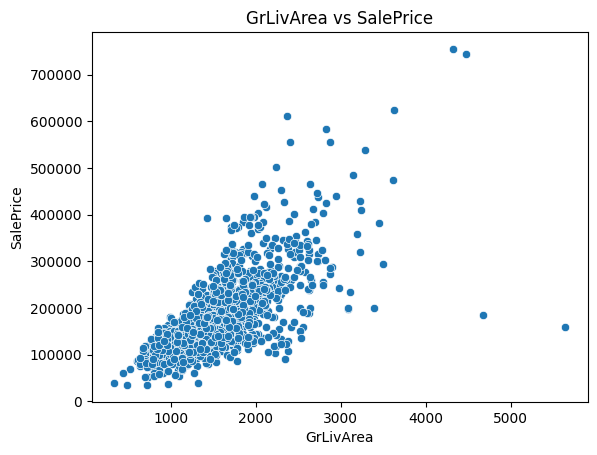

In [8]:
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', data = train_data)
plt.title('GrLivArea vs SalePrice')

Text(0.5, 1.0, 'TotRmsAbvGrd vs SalePrice')

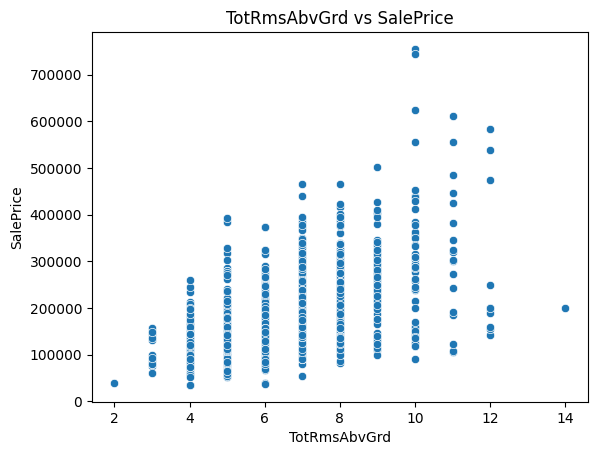

In [9]:
sns.scatterplot(x = 'TotRmsAbvGrd', y = 'SalePrice', data = train_data)
plt.title('TotRmsAbvGrd vs SalePrice')

Text(0.5, 1.0, 'OverallQual vs SalePrice')

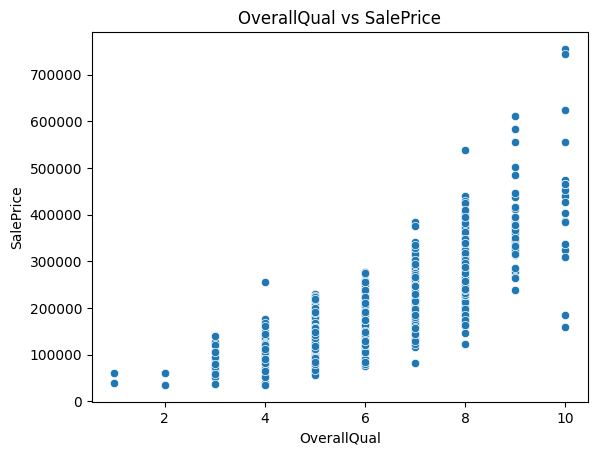

In [10]:
sns.scatterplot(x = 'OverallQual', y = 'SalePrice', data = train_data)
plt.title('OverallQual vs SalePrice')

Text(0.5, 0.98, 'Histograms of Training Data')

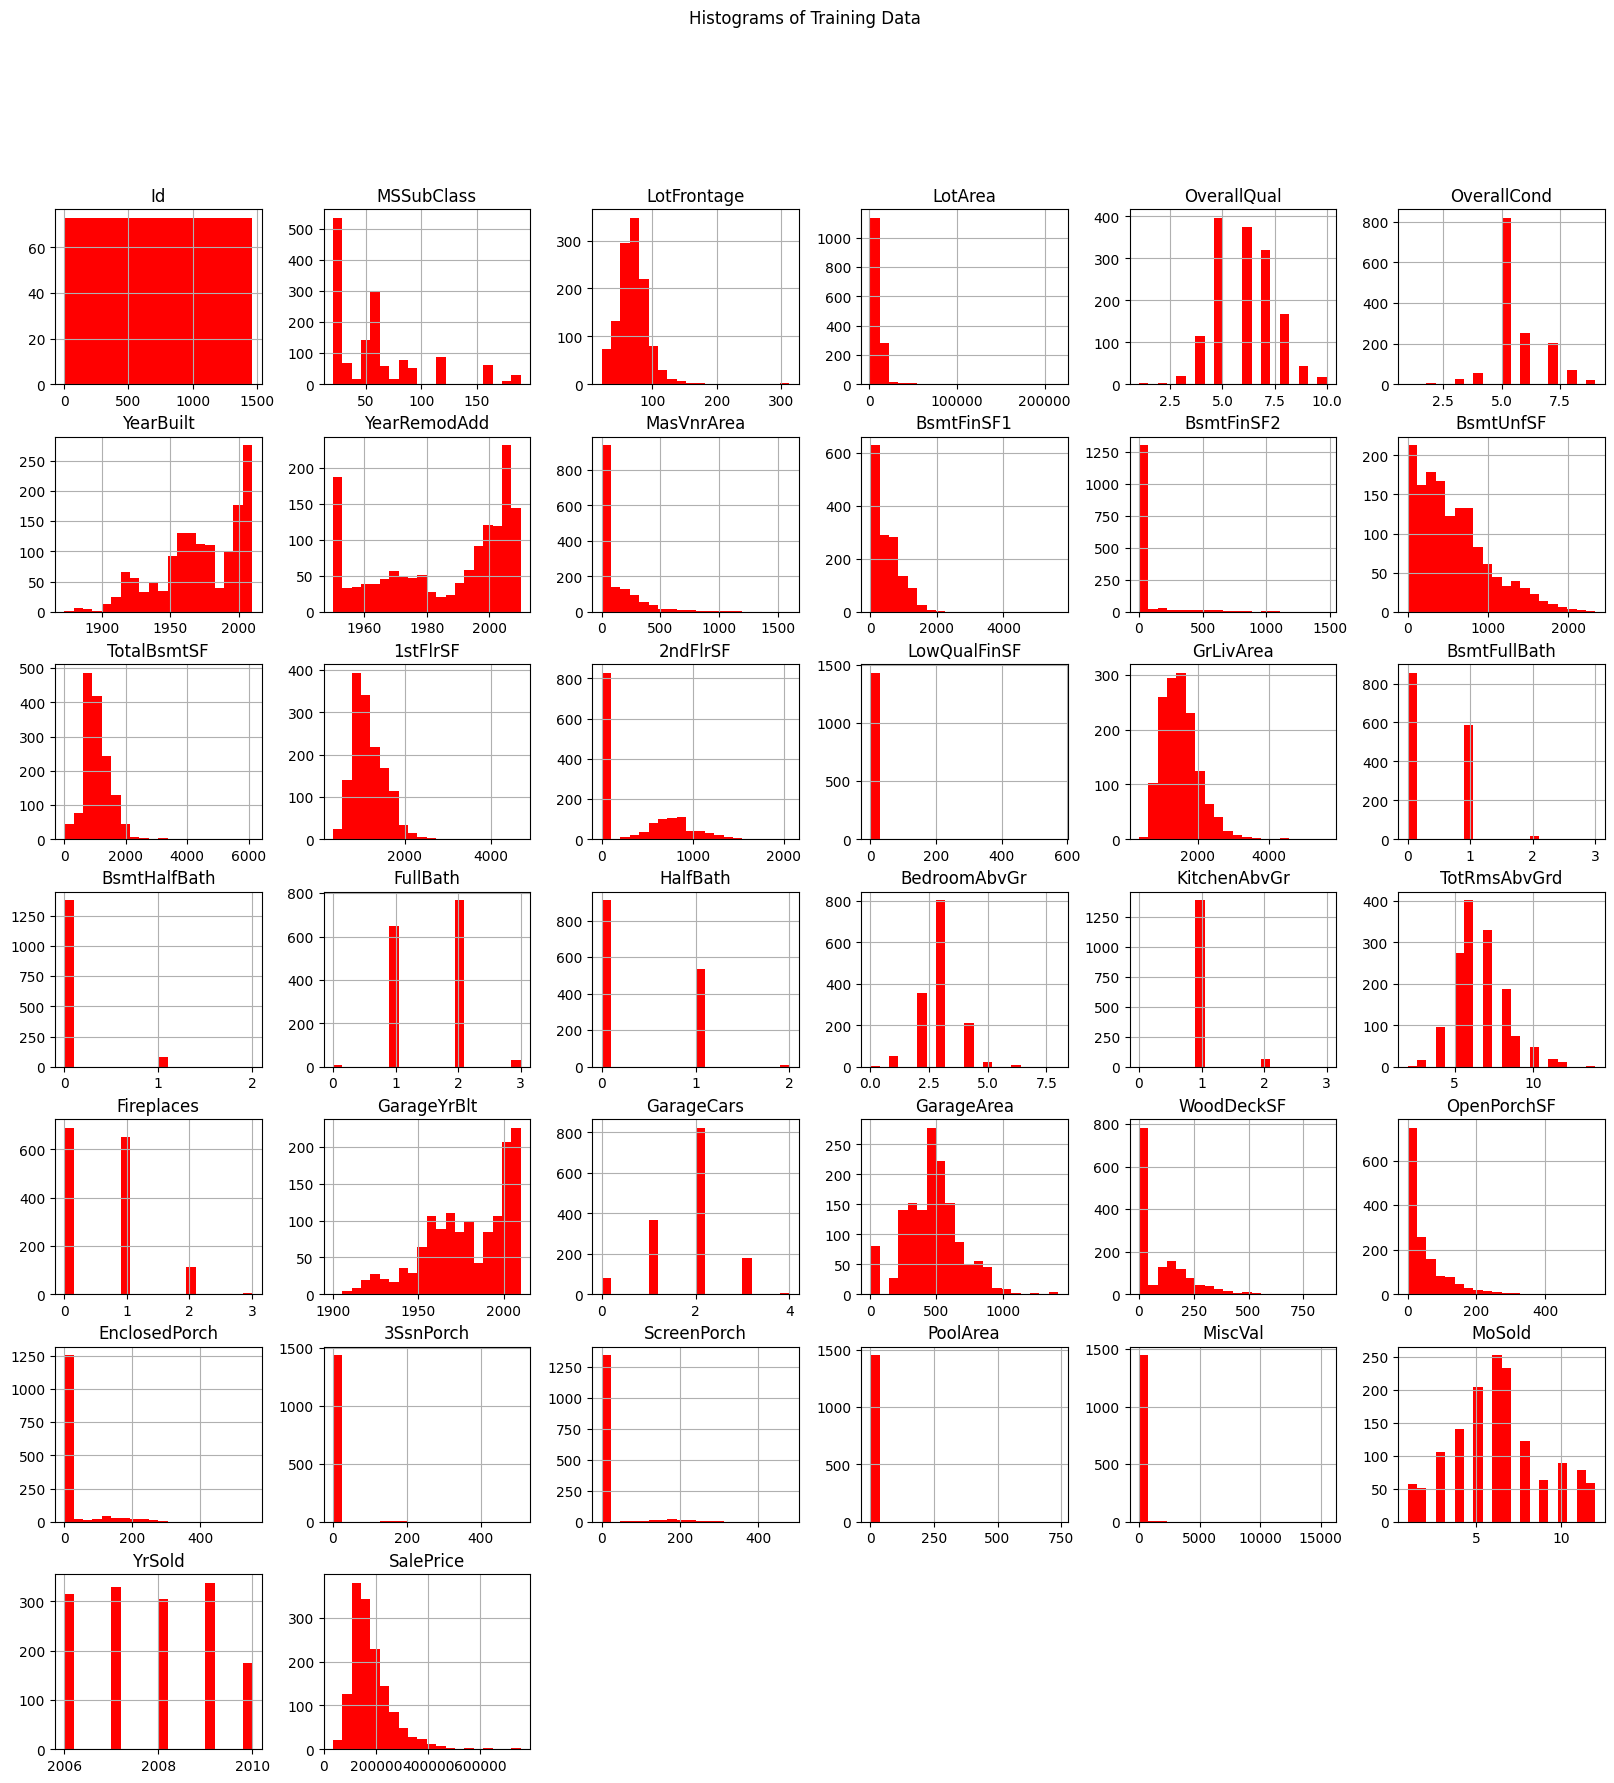

In [11]:
train_data.hist(bins = 20, figsize = (20,20), color = 'r');
plt.suptitle('Histograms of Training Data')

**Histogram of Sale Prices**

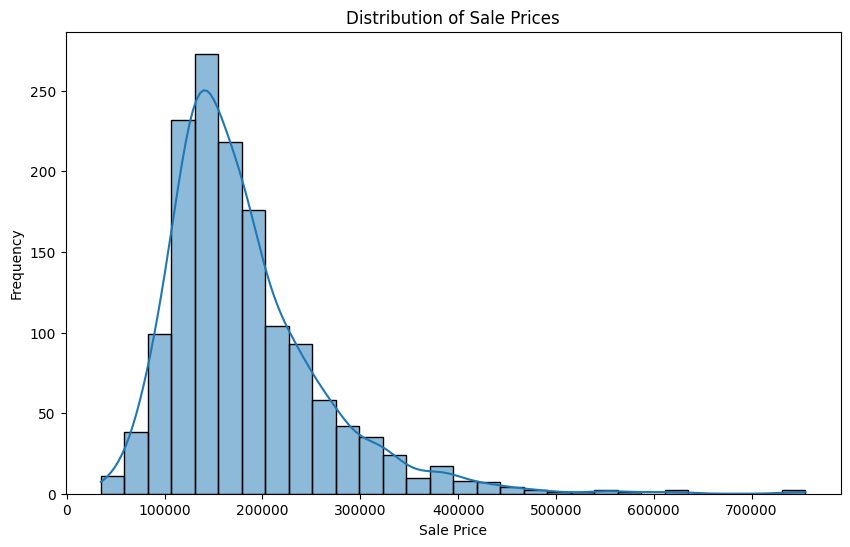

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x="SalePrice", bins=30, kde=True)
plt.title("Distribution of Sale Prices")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()

The histogram reveals that the distribution of sale prices is right-skewed meaning that most houses have lower sale prices, with a long tail of higher-priced houses. This information is essential for understanding the dataset as it highlights the need to address potential outliers in the modeling process and consider transformations to make the data more suitable for regression.

**Correlation Heatmap**

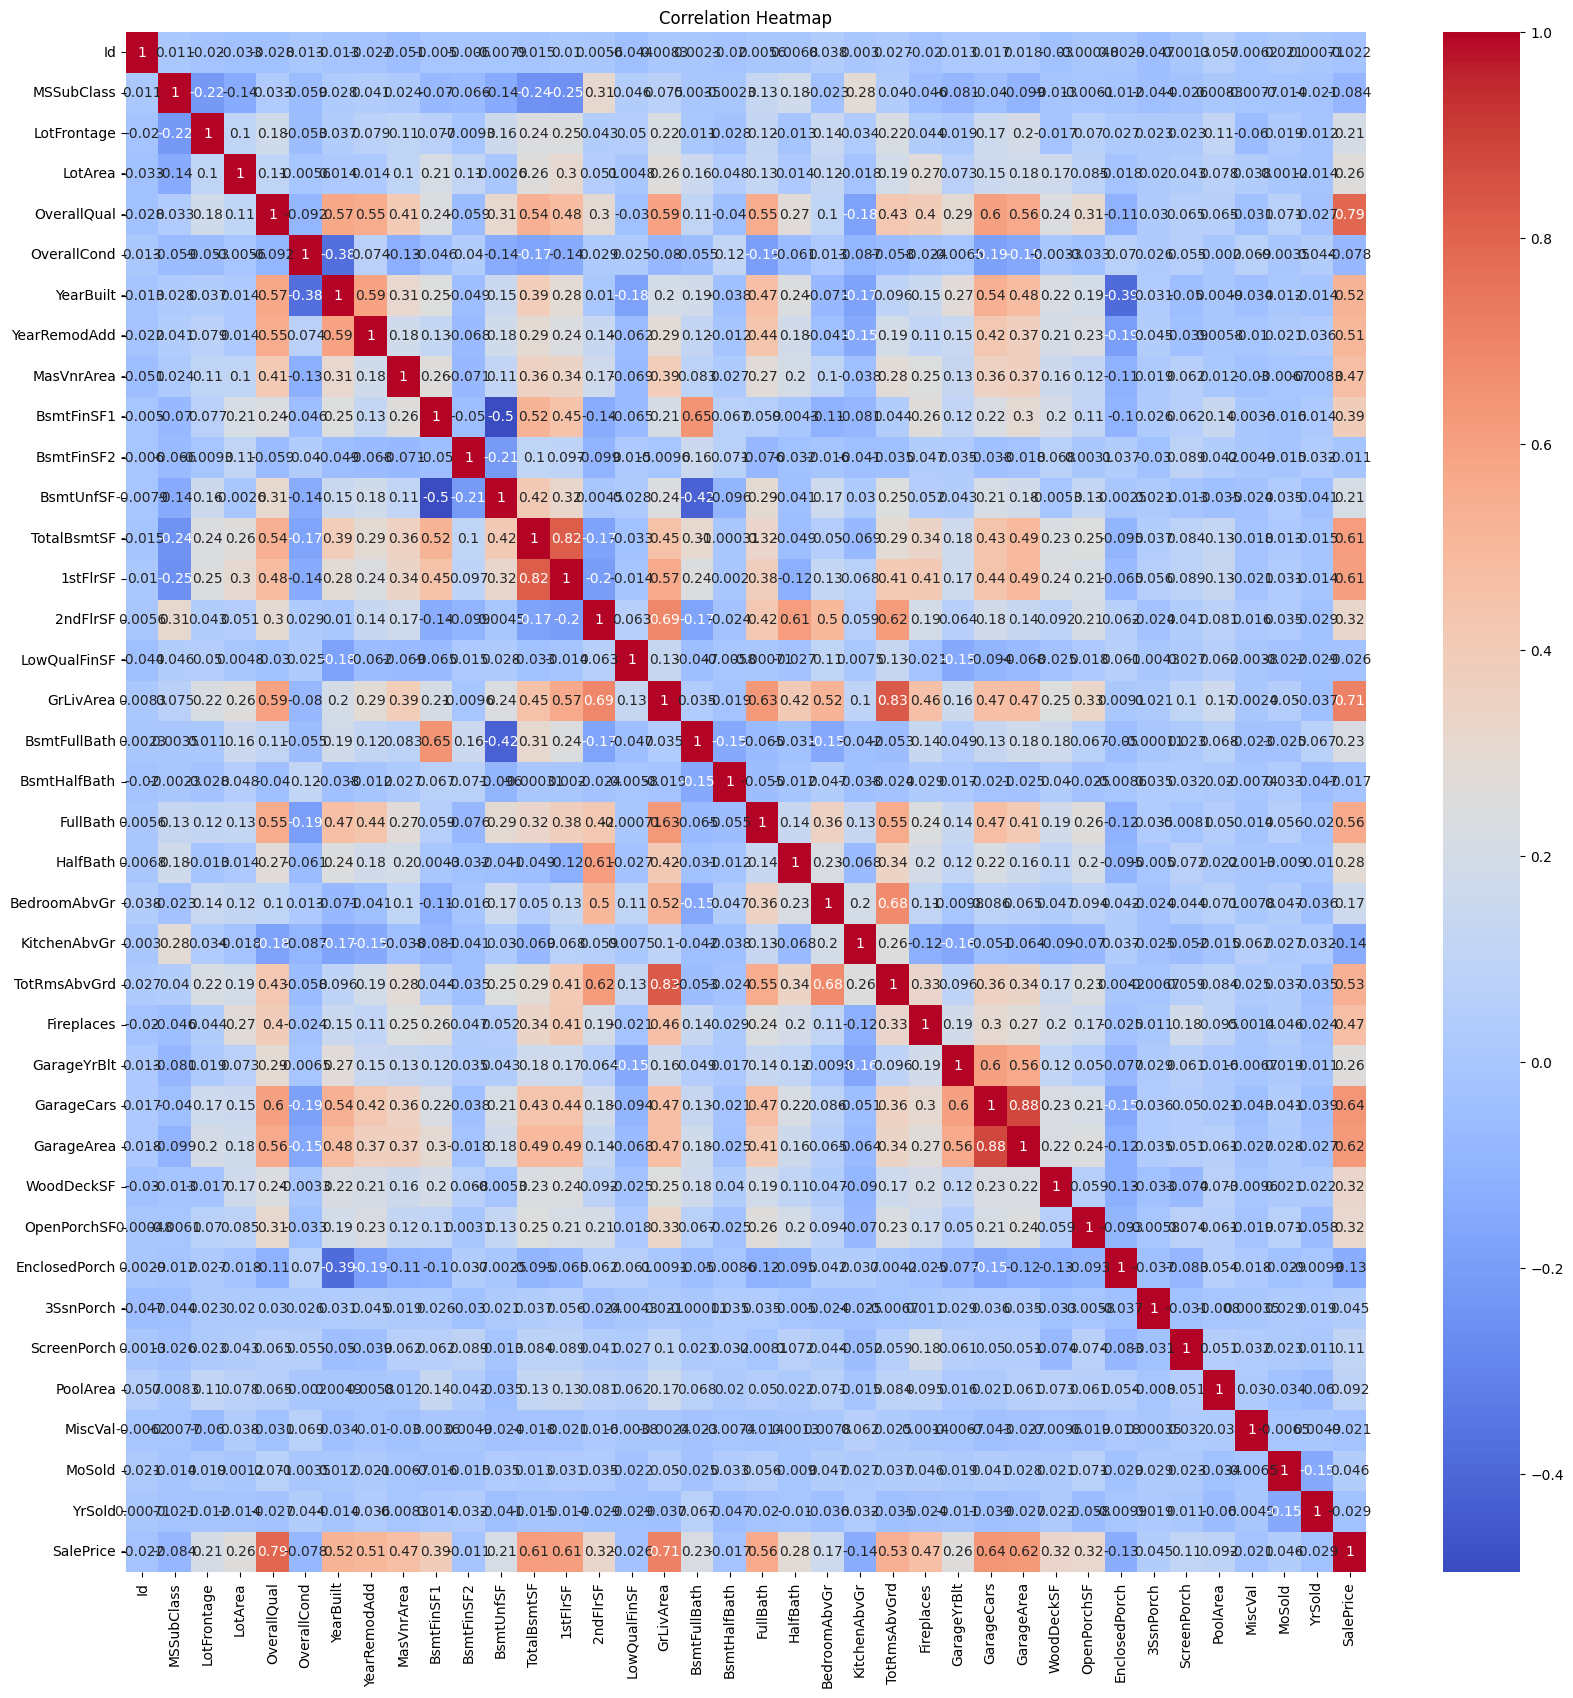

In [13]:
numeric_columns = train_data.select_dtypes(include=['int64', 'float64']) # Only numeric columns for correlation analysis
missing_values = numeric_columns.isnull().sum() # Check for missing values in the numeric columns
numeric_columns = numeric_columns.fillna(0) # If there are missing values, fill them with 0
correlation_matrix = numeric_columns.corr() # Create correlation matrix

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()

The correlation heatmap displays the relationships between variables. Features strongly correlated with "SalePrice" are likely to be important predictors in regression models. For example, "OverallQual" (Overall material and finish quality) and "GrLivArea" (Above ground living area) show strong positive correlations with sale prices, indicating their significance in predicting house prices. On the other hand, features with weak or negative correlations may not be as relevant.

**Box Plot of Overall Quality vs. Sale Price**

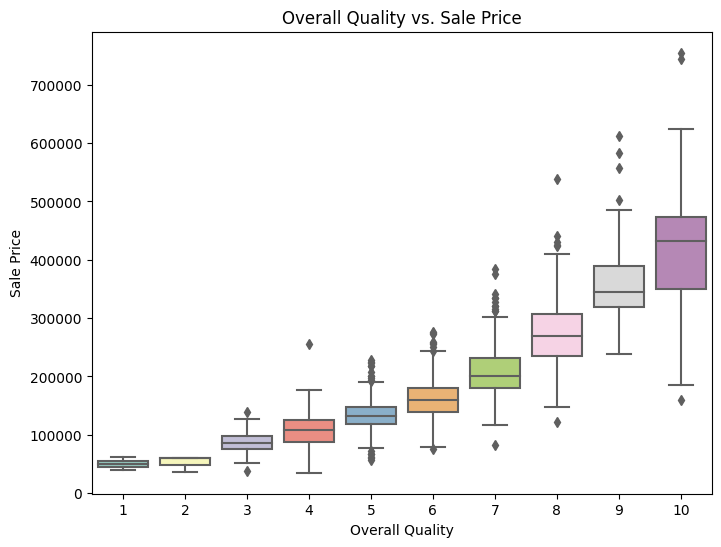

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_data, x="OverallQual", y="SalePrice", palette="Set3")
plt.title("Overall Quality vs. Sale Price")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.show()

The box plot highlights the relationship between the overall quality rating of houses and their sale prices. As expected, the chart shows that higher quality ratings are associated with higher sale prices. This information is valuable for potential homebuyers and real estate professionals looking to understand how a house's overall quality affects its market price.

# 3. Data Preprocessing

In [15]:
def handle_missing_values(data):
    threshold = 0.8
    data = data.dropna(thresh=len(data) * threshold, axis=1)
    
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

    categorical_cols = data.select_dtypes(exclude=[np.number]).columns
    data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

    return data

train_data = handle_missing_values(train_data)
test_data = handle_missing_values(test_data)

train_data['SalePrice'] = np.log1p(train_data['SalePrice'])  # Log transform the target variable

# 4. Feature Engineering

In [16]:
categorical_features = train_data.select_dtypes(exclude=[np.number])
print("\nCategorical Features:")
print("---------------------")
print(categorical_features.head())


Categorical Features:
---------------------
  MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... Electrical KitchenQual Functional  \
0      CollgCr       Norm       Norm  ...      SBrkr          Gd        Typ   
1      Veenker      Feedr       Norm  ...      SBrkr          TA        Typ   
2      CollgCr       Norm       Norm  ...      SBrkr          Gd        Typ   
3      Crawfor       Norm       Norm  ...      SBrkr          Gd        Typ   
4      NoRidge       Norm       Norm  ...      SBrkr          Gd        Typ   

  GarageType GarageFinish GarageQual GarageCond

# 5. Data Splitting

In [17]:
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Data Transformation

In [18]:
numerical_features = X.select_dtypes(include=[np.number]).columns
categorical_features = X.select_dtypes(exclude=[np.number]).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train_processed = preprocessor.fit_transform(X_train)
X_valid_processed = preprocessor.transform(X_valid)
X_test_processed = preprocessor.transform(test_data)


# 7. Model Selection and Training

In [19]:
cat_model = cb.CatBoostRegressor(verbose=0, random_state=42)
cat_model.fit(X_train_processed, y_train)

# 8. Model Evaluation

In [20]:
def evaluate_model(model, X_valid_processed, y_valid):
    y_valid_pred = model.predict(X_valid_processed)
    mse = mean_squared_error(y_valid, y_valid_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_valid, y_valid_pred)
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'R-squared: {r2}')
    return mse, rmse, r2

print("CatBoost Regressor:")
evaluate_model(cat_model, X_valid_processed, y_valid)


y_test_pred = cat_model.predict(X_test_processed)
y_test_pred = np.expm1(y_test_pred)  


if 'Id' in test_data.columns:
    submission_df = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': y_test_pred})
else:
    submission_df = pd.DataFrame({'SalePrice': y_test_pred})

submission_df.to_csv('house_price_prediction_submission.csv', index=False)
print("Submission file created: house_price_prediction_submission.csv")

CatBoost Regressor:
Mean Squared Error: 0.015707259990182663
Root Mean Squared Error: 0.12532860802778695
R-squared: 0.9158288581559665
Submission file created: house_price_prediction_submission.csv
